In [ ]:
import tensorflow as tf
print("✅ TensorFlow version:", tf.__version__)
print("✅ GPU available:", tf.config.list_physical_devices('GPU'))


✅ TensorFlow version: 2.19.0
✅ GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
#importing the important libraries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,Rescaling,RandomFlip,RandomRotation,RandomZoom,GlobalAveragePooling2D
from tensorflow.keras import layers

# **Loading the Dataset from Kaggle**

# **Deleted the loading part for security reasons, as I used the Kaggle API.**

In [ ]:
#Creating train,val,test Directory
import os
data_dir = "/content/data/chest_xray/chest_xray"
train_dir = os.path.join(data_dir, "train")
val_dir   = os.path.join(data_dir, "val")
test_dir  = os.path.join(data_dir, "test")

In [ ]:
#Creating train,val and test data
train_ds=keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(128,128),
    batch_size=32,
    shuffle=True,
    color_mode="grayscale",
    label_mode="binary",
    labels="inferred"
)
val_ds=keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(128,128),
    batch_size=32,
    shuffle=False,
    color_mode="grayscale",
    label_mode="binary",
    labels="inferred"
)
test_ds=keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(128,128),
    batch_size=32,
    shuffle=False,
    color_mode="grayscale",
    label_mode="binary",
    labels="inferred"
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
class_name=train_ds.class_names

In [ ]:
class_name

['NORMAL', 'PNEUMONIA']

In [ ]:
#Adding Cache , AUTOTUNE for faster training process
from tensorflow.data import AUTOTUNE
train_ds=train_ds.cache().shuffle(2500).prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds=test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#perform Data Augmentation
data_aug=Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2)

])

In [ ]:
#CReate Deep Learning Model

model=Sequential()

model.add(layers.Input(shape=(128,128,1)))
model.add(Rescaling(1./255))
model.add(data_aug)


model.add(Conv2D(64,kernel_size=(3,3),activation="relu",padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation="relu",padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,kernel_size=(3,3),activation="relu",padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,kernel_size=(3,3),activation="relu",padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(256,activation="relu",kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Dense(256,activation="relu",kernel_initializer='he_normal'))
model.add(Dropout(0.4))


model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,220,353 (19.91 MB)

 Trainable params: 5,220,353 (19.91 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compile the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

#Add callback to reduce Overfitting
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",patience=10,verbose=1,restore_best_weights=True)

In [ ]:
#train the Model on TRaining data
history=model.fit(train_ds,epochs=80,validation_data=test_ds,callbacks=[early_stop])

Epoch 1/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - accuracy: 0.7143 - loss: 0.8069 - val_accuracy: 0.7340 - val_loss: 0.5325
Epoch 2/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.7933 - loss: 0.4229 - val_accuracy: 0.8125 - val_loss: 0.4199
Epoch 3/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.8416 - loss: 0.3710 - val_accuracy: 0.7933 - val_loss: 0.4336
Epoch 4/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.8781 - loss: 0.2890 - val_accuracy: 0.8061 - val_loss: 0.3929
Epoch 5/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.8929 - loss: 0.2509 - val_accuracy: 0.8494 - val_loss: 0.3537
Epoch 6/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9047 - loss: 0.2417 - val_accuracy: 0.8638 - val_loss: 0.3227
Epoch 7/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9080 - loss: 0.2368 - val_accuracy: 0.8269 - val_loss: 0.3665
Epoch 8/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9071 - loss: 0.2356 - val_ac

In [ ]:
loss,accuracy=model.evaluate(test_ds)
print()
print()

print("CNN model Accuracy :", accuracy*100)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8681 - loss: 0.3465


CNN model Loss : 0.2699226438999176
CNN model Accuracy : 90.22436141967773


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = (model.predict(test_ds) > 0.5).astype(int)

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=['Normal','Pneumonia']))


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[193  41]
 [ 20 370]]
              precision    recall  f1-score   support

      Normal       0.91      0.82      0.86       234
   Pneumonia       0.90      0.95      0.92       390

    accuracy                           0.90       624
   macro avg       0.90      0.89      0.89       624
weighted avg       0.90      0.90      0.90       624



In [ ]:
model.save("chest_xray_model.keras")
from google.colab import files
files.download("chest_xray_model.keras")
print("Successful")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Successful


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
Predicted: NORMAL (Confidence: 0.06)


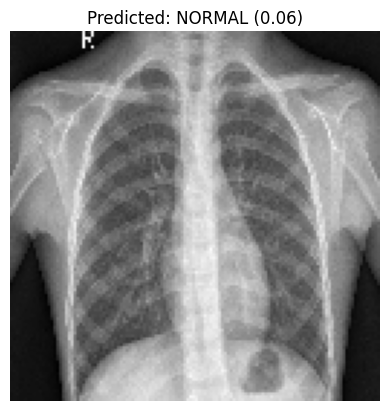

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Confirmed class names
class_name = ['NORMAL', 'PNEUMONIA']

# Load and preprocess the image
img_path = "/content/data/chest_xray/test/NORMAL/IM-0001-0001.jpeg"
img = image.load_img(img_path, target_size=(128, 128), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # normalize

# Predict
prediction = model.predict(img_array)
pred_index = int(prediction[0][0] > 0.5)  # threshold at 0.5
pred_class = class_name[pred_index]

print(f"Predicted: {pred_class} (Confidence: {prediction[0][0]:.2f})")

# Visualize
plt.imshow(img, cmap="gray")
plt.title(f"Predicted: {pred_class} ({prediction[0][0]:.2f})")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted: PNEUMONIA (Confidence: 1.00)


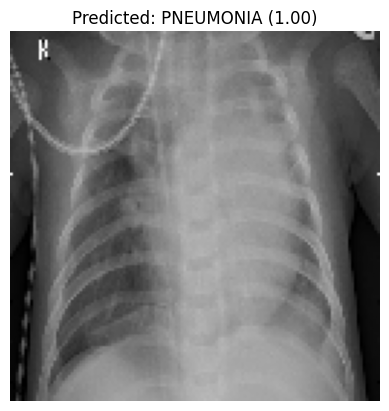

In [ ]:
# Confirmed class names
class_name = ['NORMAL', 'PNEUMONIA']

# Load and preprocess the image
img_path = "/content/data/chest_xray/test/PNEUMONIA/person100_bacteria_479.jpeg"
img = image.load_img(img_path, target_size=(128, 128), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # normalize

# Predict
prediction = model.predict(img_array)
pred_index = int(prediction[0][0] > 0.5)  # threshold at 0.5
pred_class = class_name[pred_index]

print(f"Predicted: {pred_class} (Confidence: {prediction[0][0]:.2f})")

# Visualize
plt.imshow(img, cmap="gray")
plt.title(f"Predicted: {pred_class} ({prediction[0][0]:.2f})")
plt.axis("off")
plt.show()


# **USING RESNET50**

In [ ]:
#Add pretrained model ResNet50

from tensorflow.keras.applications import ResNet50
base_model_resnet=ResNet50(include_top=False,input_shape=(224,224,3),weights='imagenet')

In [ ]:
#Creating train,val and test data
train_ds_resnet=keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224,224),
    batch_size=32,
    shuffle=True,
    color_mode="rgb",
    label_mode="binary",
    labels="inferred"
)
val_ds_resnet=keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224,224),
    batch_size=32,
    shuffle=False,
    color_mode="rgb",
    label_mode="binary",
    labels="inferred"
)
test_ds_resnet=keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224,224),
    batch_size=32,
    shuffle=False,
    color_mode="rgb",
    label_mode="binary",
    labels="inferred"
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
#perform Data Augmentation
data_aug_resnet=Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2)

])

In [ ]:
#Freeze all layers
for layer in base_model_resnet.layers:
    layer.trainable = False


#unfreeze last 40 layers
for layer in base_model_resnet.layers[-100:]:
  layer.trainable=True



inp=layers.Input(shape=(224,224,3))

x=data_aug_resnet(inp)
x=base_model_resnet(x)

#add own fully connected layers

x=GlobalAveragePooling2D()(x)
x=Dense(512,activation="relu",kernel_initializer='he_normal')(x)
x=Dropout(0.4)(x)
output=Dense(1,activation="sigmoid")(x)



model_resnet=Model(inp,output)

In [ ]:
model_resnet.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 23,201,537 (88.51 MB)

 Non-trainable params: 1,435,776 (5.48 MB)

In [ ]:
#compile the model
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.000001)
model_resnet.compile(optimizer=adam,loss="binary_crossentropy",metrics=["accuracy"])


#apply earlystopping to reduce overfitting
early_stop_resnet=EarlyStopping(monitor="val_loss",patience=10,verbose=1,restore_best_weights=True)

In [ ]:
#fit the model
history_resnet=model_resnet.fit(train_ds_resnet,epochs=80,validation_data=test_ds_resnet,verbose=1,callbacks=[early_stop_resnet])

Epoch 1/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 364ms/step - accuracy: 0.6660 - loss: 0.6250 - val_accuracy: 0.6715 - val_loss: 0.5878
Epoch 2/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 347ms/step - accuracy: 0.7768 - loss: 0.4728 - val_accuracy: 0.6811 - val_loss: 0.5603
Epoch 3/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 349ms/step - accuracy: 0.8280 - loss: 0.3841 - val_accuracy: 0.7035 - val_loss: 0.5401
Epoch 4/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 55s 338ms/step - accuracy: 0.8742 - loss: 0.3047 - val_accuracy: 0.7436 - val_loss: 0.5253
Epoch 5/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 346ms/step - accuracy: 0.8956 - loss: 0.2665 - val_accuracy: 0.7564 - val_loss: 0.5120
Epoch 6/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 55s 335ms/step - accuracy: 0.9034 - loss: 0.2390 - val_accuracy: 0.7692 - val_loss: 0.5110
Epoch 7/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 55s 334ms/step - accuracy: 0.9218 - loss: 0.2099 - val_accuracy: 0.7692 - val_loss: 0.5176
Epoch 8/80
163/163 ━━━━━━━━━━━━━━━━━━━━ 55s 336ms/step - accuracy: 0.9310 - loss: 0

In [ ]:
model_resnet.save("chest_xray_model_resnet.keras")
from google.colab import files
if files.download("chest_xray_model_resnet.keras"):
  print("Successful")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

loss_resnet,accuracy_resnet=model_resnet.evaluate(test_ds_resnet)
print("ResNet model Accuracy :" ,accuracy_resnet)
y_true__resnet = np.concatenate([y for x, y in test_ds_resnet], axis=0)
y_pred_resnet = (model_resnet.predict(test_ds_resnet) > 0.5).astype(int)

print(confusion_matrix(y_true__resnet, y_pred_resnet))
print(classification_report(y_true__resnet, y_pred_resnet, target_names=['Normal','Pneumonia']))


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.8203 - loss: 0.5852
ResNet model Accuracy : 0.8862179517745972
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step
[[172  62]
 [  9 381]]
              precision    recall  f1-score   support

      Normal       0.95      0.74      0.83       234
   Pneumonia       0.86      0.98      0.91       390

    accuracy                           0.89       624
   macro avg       0.91      0.86      0.87       624
weighted avg       0.89      0.89      0.88       624



# **EfficientNetB0**

In [ ]:
#Add pretrained model ResNet50

from tensorflow.keras.applications import EfficientNetB0
base_model_eff=EfficientNetB0(include_top=False,input_shape=(224,224,3),weights='imagenet')


#Creating train,val and test data
train_ds_eff=keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224,224),
    batch_size=64,
    shuffle=True,
    color_mode="rgb",
    label_mode="binary",
    labels="inferred"
)
val_ds_eff=keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224,224),
    batch_size=64,
    shuffle=False,
    color_mode="rgb",
    label_mode="binary",
    labels="inferred"
)
test_ds_eff=keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224,224),
    batch_size=64,
    shuffle=False,
    color_mode="rgb",
    label_mode="binary",
    labels="inferred"
)

#perform Data Augmentation
data_aug_eff=Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2)

])

#Freeze all layers
for layer in base_model_resnet.layers:
    layer.trainable = False


#unfreeze last 40 layers
for layer in base_model_resnet.layers[-70:]:
  layer.trainable=True



inp=layers.Input(shape=(224,224,3))

x=data_aug_eff(inp)
x=base_model_eff(x)

#add own fully connected layers

x=GlobalAveragePooling2D()(x)
x=Dense(512,activation="relu",kernel_initializer='he_normal')(x)
x=Dropout(0.4)(x)
output=Dense(1,activation="sigmoid")(x)



model_eff=Model(inp,output)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
model_eff.summary()

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,705,956 (17.95 MB)

 Trainable params: 4,663,933 (17.79 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
#compile the model
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.000001)
model_eff.compile(optimizer=adam,loss="binary_crossentropy",metrics=["accuracy"])


#apply earlystopping to reduce overfitting
early_stop_eff=EarlyStopping(monitor="val_loss",patience=10,verbose=1,restore_best_weights=True)

In [ ]:
history_eff=model_eff.fit(train_ds_eff,epochs=80,validation_data=test_ds_eff,verbose=1,callbacks=[early_stop_eff])

Epoch 1/80
82/82 ━━━━━━━━━━━━━━━━━━━━ 97s 725ms/step - accuracy: 0.5540 - loss: 0.6869 - val_accuracy: 0.6635 - val_loss: 0.6339
Epoch 2/80
82/82 ━━━━━━━━━━━━━━━━━━━━ 56s 676ms/step - accuracy: 0.6111 - loss: 0.6550 - val_accuracy: 0.6378 - val_loss: 0.6339
Epoch 3/80
82/82 ━━━━━━━━━━━━━━━━━━━━ 58s 702ms/step - accuracy: 0.6692 - loss: 0.6276 - val_accuracy: 0.6426 - val_loss: 0.6260
Epoch 4/80
82/82 ━━━━━━━━━━━━━━━━━━━━ 58s 705ms/step - accuracy: 0.7099 - loss: 0.5963 - val_accuracy: 0.6442 - val_loss: 0.6187
Epoch 5/80
82/82 ━━━━━━━━━━━━━━━━━━━━ 56s 677ms/step - accuracy: 0.7349 - loss: 0.5769 - val_accuracy: 0.6378 - val_loss: 0.6129
Epoch 6/80
82/82 ━━━━━━━━━━━━━━━━━━━━ 56s 683ms/step - accuracy: 0.7482 - loss: 0.5598 - val_accuracy: 0.6378 - val_loss: 0.6056
Epoch 7/80
82/82 ━━━━━━━━━━━━━━━━━━━━ 56s 675ms/step - accuracy: 0.7806 - loss: 0.5295 - val_accuracy: 0.6490 - val_loss: 0.5929
Epoch 8/80
82/82 ━━━━━━━━━━━━━━━━━━━━ 56s 679ms/step - accuracy: 0.7792 - loss: 0.5105 - val_accu

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

loss_eff,accuracy_eff=model_eff.evaluate(test_ds_eff)
print("EfficientNetB0 model Accuracy :" ,accuracy_eff)
y_true__eff = np.concatenate([y for x, y in test_ds_eff], axis=0)
y_pred_eff = (model_eff.predict(test_ds_eff) > 0.5).astype(int)

print(confusion_matrix(y_true__eff, y_pred_eff))
print(classification_report(y_true__eff, y_pred_eff, target_names=['Normal','Pneumonia']))


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - accuracy: 0.9239 - loss: 0.2557
EfficientNetB0 model Accuracy : 0.8942307829856873
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 378ms/step
[[217  17]
 [ 49 341]]
              precision    recall  f1-score   support

      Normal       0.82      0.93      0.87       234
   Pneumonia       0.95      0.87      0.91       390

    accuracy                           0.89       624
   macro avg       0.88      0.90      0.89       624
weighted avg       0.90      0.89      0.90       624



In [ ]:
model_eff.save("chest_xray_model_eff.keras")
from google.colab import files
if files.download("chest_xray_model_eff.keras"):
  print("Successful")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>